[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


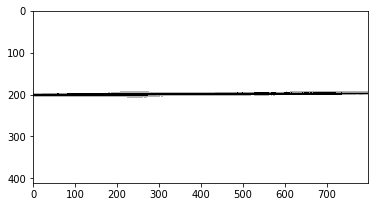

ValueError: Image contains values other than 0 and 1

In [12]:
#skeleton

import pandas as pd
import numpy as np
from skimage.morphology import skeletonize
from skimage import io
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#import image
image1 = cv2.imread('test1.jpg')
#plt.imshow(image)

#convert to gray
#https://pythonprogramming.net/thresholding-image-analysis-python-opencv-tutorial/
ret,th1 = cv2.threshold(image1,190,255,cv2.THRESH_BINARY)
#http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Global_Thresholding_Adaptive_Thresholding_Otsus_Binarization_Segmentations.php

grayscaled = cv2.cvtColor(th1,cv2.COLOR_BGR2GRAY)
print(grayscaled)

plt.imshow(grayscaled,cmap='binary')
plt.show()

skeleton = skeletonize(grayscaled)

plt.imshow(skeleton)
plt.show()

image2 = pd.DataFrame(skeleton)
line = pd.DataFrame(np.zeros((image2.shape[1],3)),columns=['x','y','z'])

plt.imshow(image2,cmap='binary')
plt.show()
z = 2
k = 0
print(image2.shape[1])
for i in range(0,image2.shape[0]):
    for j in range(0,image2.shape[1]):
        #print(image.iloc[i,j])
        if image2.iloc[i,j] > 0:
            if k < image2.shape[1]:
                #print([i,j])
                line.iloc[k]=[i,j,z]
                k=k+1
                #print(k)
                #line.append([i,j],columns=['x','y'])
print(line)



##### camera

#https://www.raspberrypi.org/documentation/usage/camera/python/README.md

import picamera
camera = picamera.PiCamera()
camera.capture('image.jpg')

In [ ]:

#identify red
#https://pythonprogramming.net/color-filter-python-opencv-tutorial/
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red = np.array([0,100,50])
upper_red = np.array([255,255,180])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(image,image, mask= mask)

plt.imshow(image)
plt.show()

#set up dataframe
#image = pd.DataFrame(np.zeros((10,20)),columns=['a','b','c','d'])
image = pd.DataFrame(np.zeros((10,20))) #10 high 20 wide
#image.5
image.iloc[5]=1



#find pixels    https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value
#print(i)
line = pd.DataFrame(np.zeros((image.shape[1],2)),columns=['x','y'])
#line = np.array
k = 0
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        #print(image.iloc[i,j])
        if image.iloc[i,j] > 0:
            #print([i,j])
            line.iloc[k]=[i,j]
            k=k+1
            #line.append([i,j],columns=['x','y'])
#print(line)


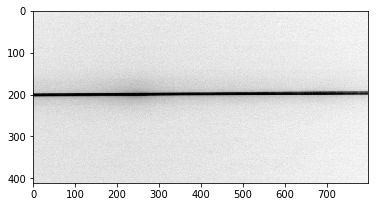

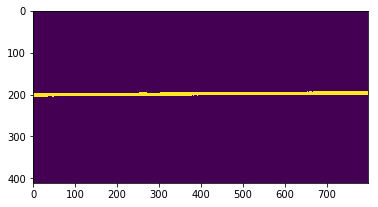

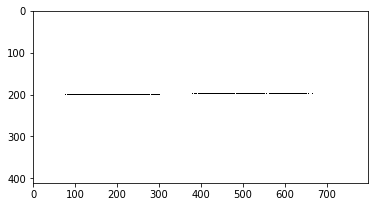

In [13]:
#open cv skeleton implentation

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#img = cv2.imread('sofsk.png',0)
img = cv2.imread('test1.jpg',0)

size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
plt.imshow(img,cmap='binary')
plt.show()    
    
ret,img = cv2.threshold(img,127,255,0)

plt.imshow(img)
plt.show()

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
plt.imshow(skel,cmap='binary')
plt.show()
